In [2]:
import matplotlib
from matplotlib import pyplot as plt

In [3]:
import fuzzy_nums
from fuzzy_nums import FuzzyNumber
from fuzzy_nums.MFs import TrapMF, TriMF
from fuzzy_nums.Arithmetics import ArithmeticController
import scipy

# Fuzzy alpha-cut arithmetic

In [9]:
sections = 250
f1, f2 = FuzzyNumber(sections=sections), FuzzyNumber(sections=sections)
arithmetic_controller = ArithmeticController()
mf_1 = TriMF(0.3, 0.5, 0.8)
mf_2 = TriMF(0.1, 0.3, 0.6)

f1.set_mf(mf_1)
f2.set_mf(mf_2)

In [10]:
import skfuzzy as fuzzy
import skfuzzy.fuzzymath as fmath
import numpy as np

In [11]:
def get_v_mf(f):
    if f.mf_func.mf_type == 'polygon':
        v = [v for v, mf in f.mf_func.polygon]
        mf = [mf for v, mf in f.mf_func.polygon]
    
    if f.mf_func.mf_type == 'TriMF':
        v = [f.mf_func.a, f.mf_func.b, f.mf_func.c]
        mf = [0, 1, 0]
        
    if f.mf_func.mf_type == 'TrapMF':
        v = [f.mf_func.a, f.mf_func.b, f.mf_func.c, f.mf_func.d]
        mf = [0, 1, 1, 0]
        
    return v, mf

## Plots for arithmetic operations

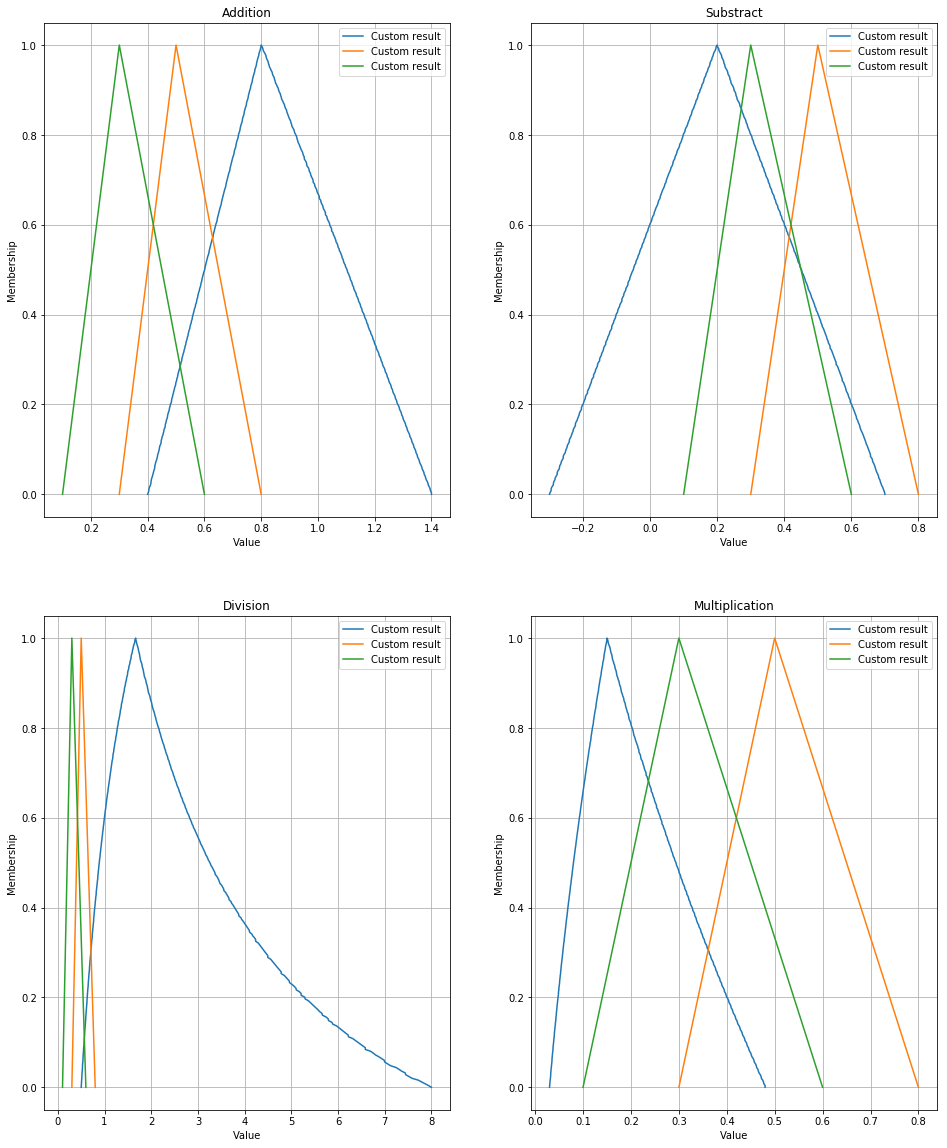

In [12]:
def plot_arithmetic(f1, f2):
    add_f = f1 + f2
    sub_f = f1 - f2
    div_f = f1 / f2
    mul_f = f1 * f2
    
    plt.figure(figsize=(16, 20))
    
    def plot_mf(custom_number, f1, f2, title):
        v_custom, mf_custom = get_v_mf(custom_number)
        f1_custom, f1_mf = get_v_mf(f1)
        f2_custom, f2_mf = get_v_mf(f2)
        
        plt.title(title)
        plt.plot(v_custom, mf_custom, label='Custom result')
        plt.plot(f1_custom, f1_mf, label='Custom result')
        plt.plot(f2_custom, f2_mf, label='Custom result')
        
        plt.xlabel('Value')
        plt.ylabel('Membership')
        plt.legend()
        plt.grid()
    
    plt.subplot(221)
    plot_mf(add_f, f1, f2, 'Addition')
    
    plt.subplot(222)
    plot_mf(sub_f, f1, f2, 'Substract')
    
    plt.subplot(223)
    plot_mf(div_f, f1, f2, 'Division')
    
    plt.subplot(224)
    plot_mf(mul_f, f1, f2, 'Multiplication')
    
    plt.show()

plot_arithmetic(f1, f2)